 First, we'll need a way to retrieve the cryptocurrency market data we need. Yahoo Finance is a popular website and service that provides up-to-date financial news and market quotes. Luckily, there is a Python library called yfinance that allows you to easily access and save this data. Let's go ahead and install it.

In [3]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 978.8 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 11.0 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 2.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 40.4 MB/s eta 0:00:0000:0100:01m
  Created wheel for peewee: filename=peewee-3.17.0-cp310-cp310-linux_x86_64.whl size=851422 sha256=25c097b61ba9f46a9713b9f59b73557d46c209f64035fc7689654e176bf0ec50
  Stored in directory: /home/codespace/.cache/pip/wheels/c7/70/ad/212867e96e7004265a69c4aa5dcff00a95f547a67ba26e7e76
Successfully built peewee


In [6]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.dates import DateFormatter

The yfinance library has a built-in method for retrieving historical market data. Let's use this to get the exchange rate of Bitcoin to US Dollars over the year of 2022. We use the `download()` method, passing in the ticker we're interested in ("BTC-USD"), the start and end dates, and the time interval between datapoints. Let's use a 1 day interval.

In [48]:
# Retrieve one year of Bitcoin to USD exchange rates with a 1 day interval and save the dataframe to a variable.
BTC_USD = yf.download("BTC-USD", start='2021-01-01', end='2022-12-31', interval='1d')

[*********************100%%**********************]  1 of 1 completed


In [49]:
BTC_USD.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359
2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765
2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202
2021-01-04,32810.949219,33440.218750,28722.755859,31971.914062,31971.914062,81163475344
2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782


### Create a Price Chart


A great way to get a feel for the data you're working with is to create a basic plot to visualize it. Price charts are an essential tool for understanding and analyzing a given stock or currency. They are a time series showing an asset's price over time. The most basic type of price chart is the line chart.

In a line chart, we connect the adjusted closing price of the asset at the end of each day with a continuous line. We can use the matploitlib library to easily create our price chart. 

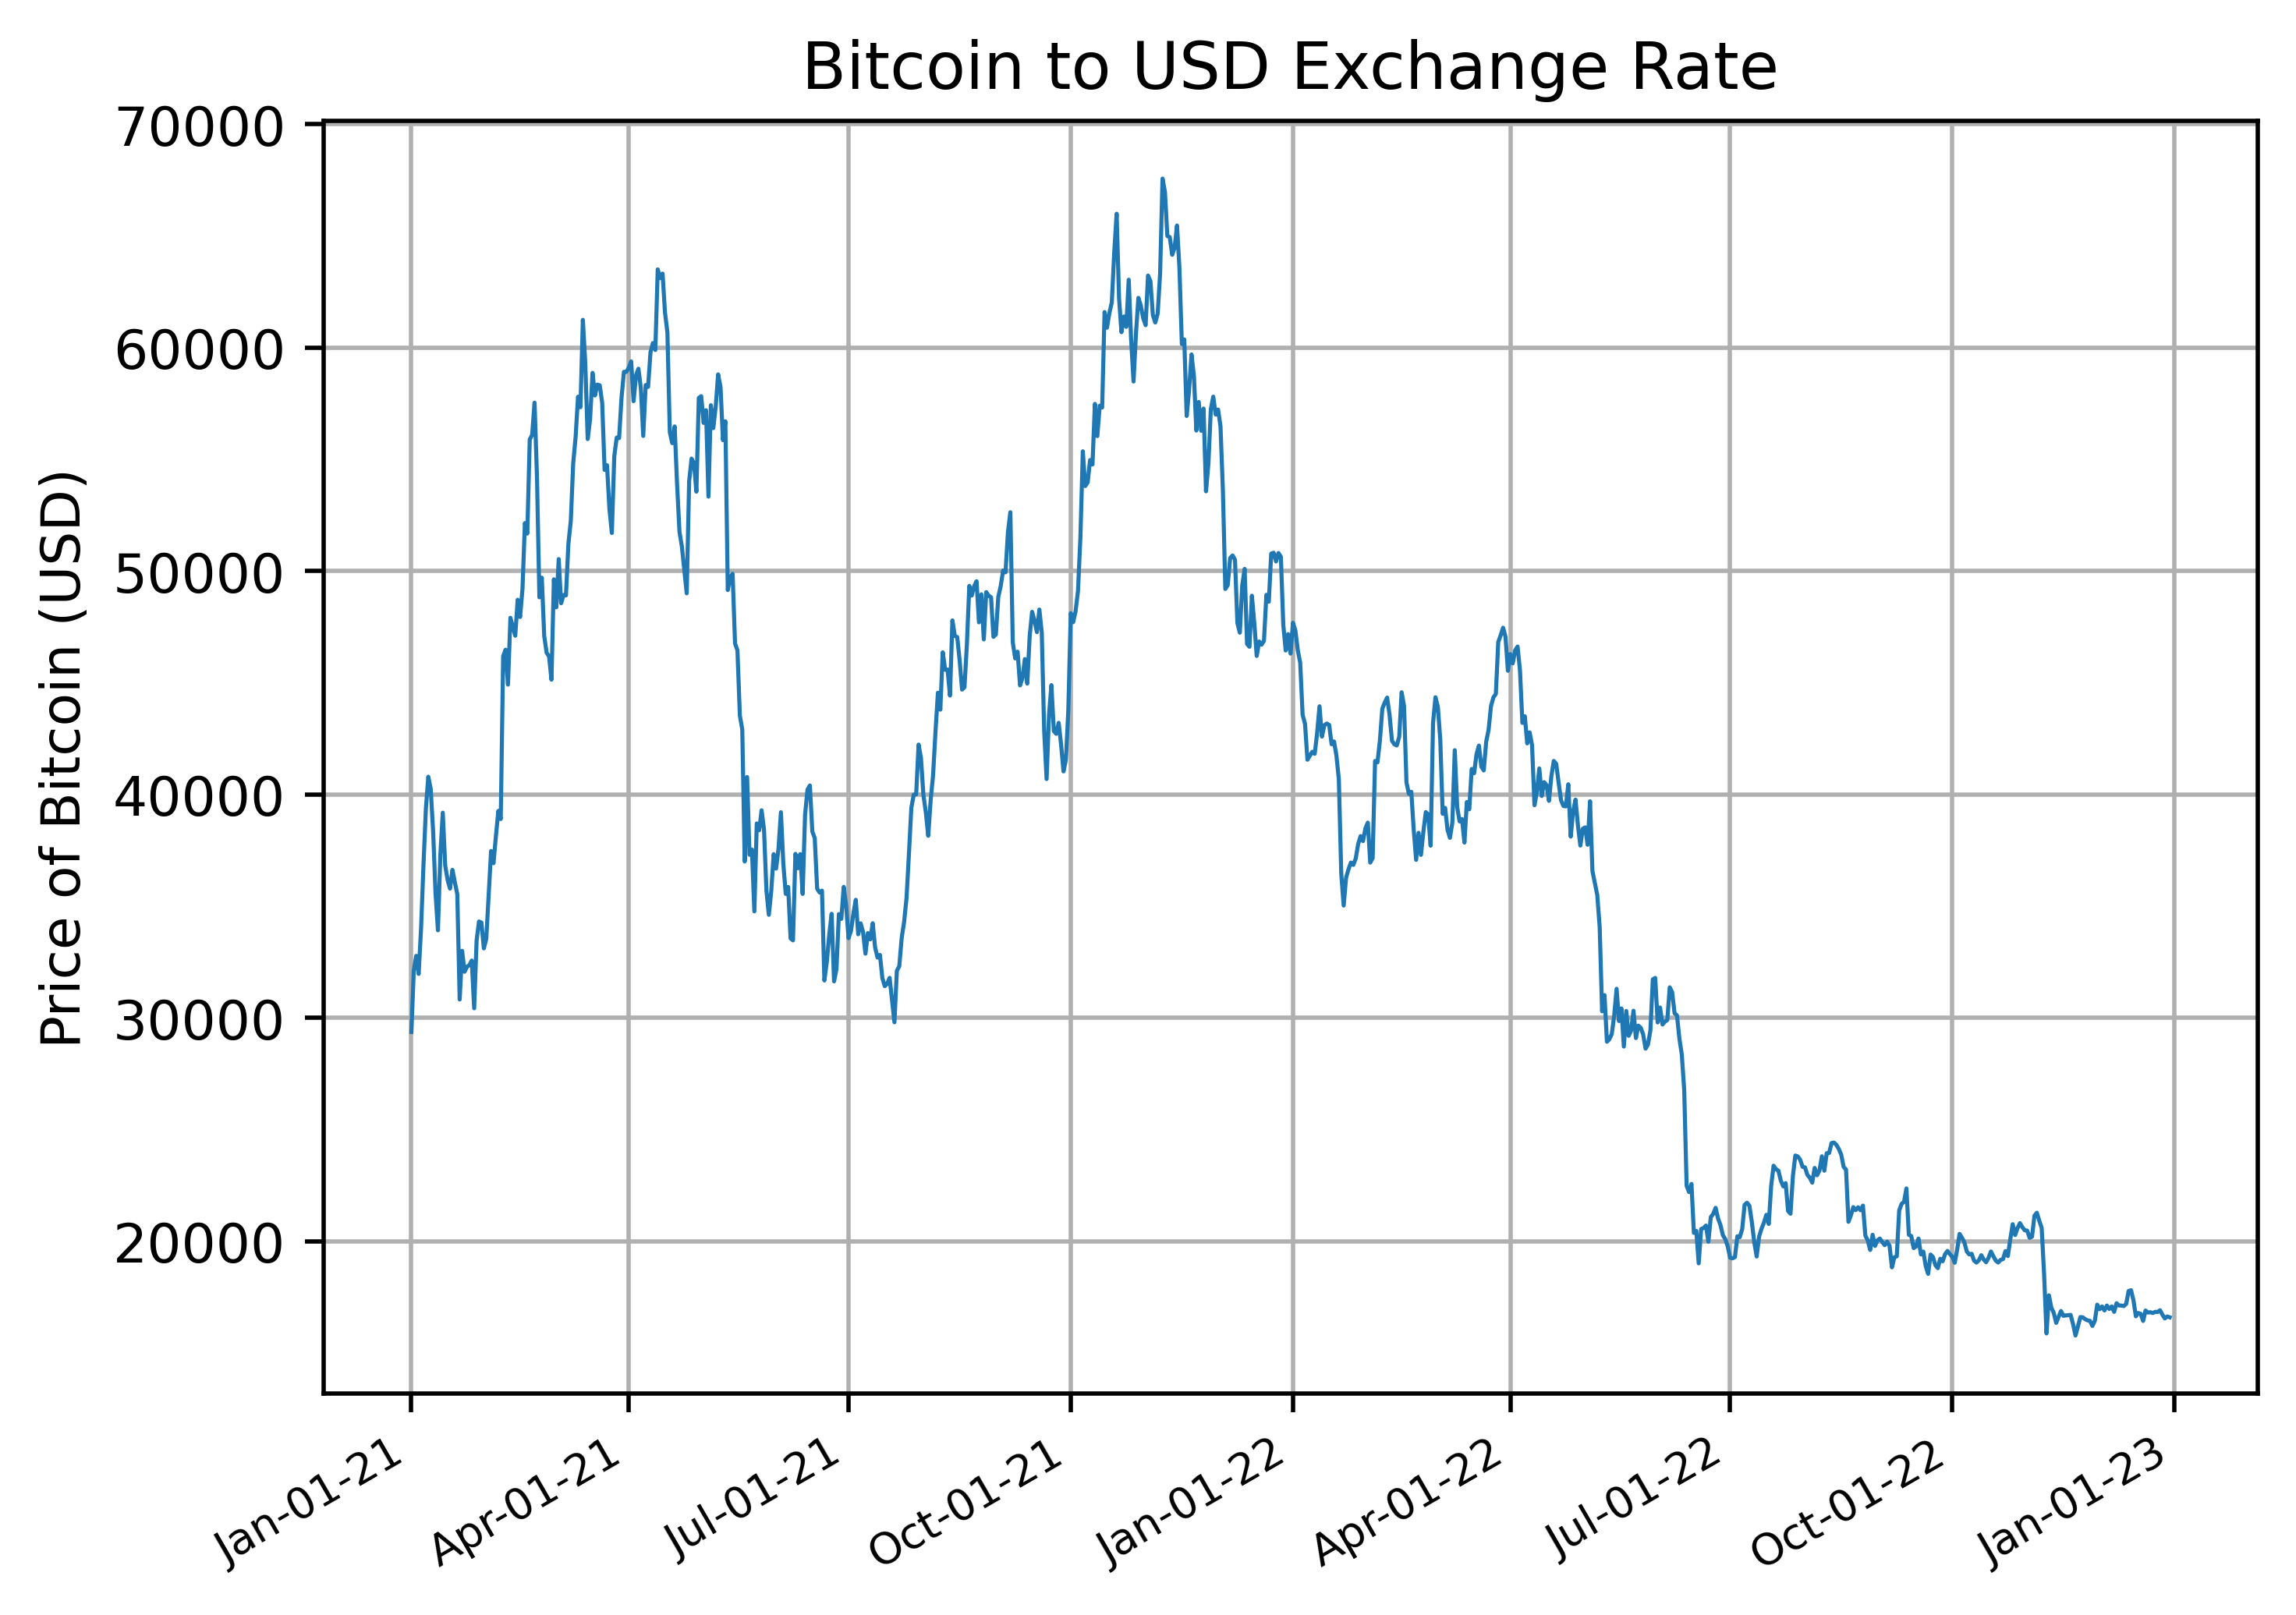

In [50]:
fig, ax = plt.subplots(dpi=500)

# Formatting the date axis
date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()

# Plotting the closing price against the date (1 day interval)
ax.plot(BTC_USD['Close'], lw=0.75)

# Adding labels and title to the plot
ax.set_ylabel('Price of Bitcoin (USD)')
ax.set_title('Bitcoin to USD Exchange Rate')
ax.grid() # adding a grid

# Displaying the price chart
plt.show()

### Some Basic Analysis

A Moving Average is a tool used in analyzing price charts. It smoothens out short-term fluctuations by calculating the average closing price over a specific period, like 9 days. This helps reveal longer-term trends in stocks or currencies. The longer the period, the smoother the effect. It's common to use multiple Moving Averages of different periods on the same chart for a more comprehensive analysis. In my case, I'm about to calculate Simple Moving Averages and overlay them on a price chart for further insights.

### Compute Simple Moving Averages

First, let's understand how Simple Moving Averages are computed. Suppose you have 9 days of data and want to compute the 3 day Simple Moving Average:

| ***Day***   | 1 | 2 | 3 | 4 | 5  | 6  | 7 | 8 | 9 |
|-------|---|---|---|---|----|----|---|---|---|
| ***Value*** | 4 | 3 | 5 | 7 | 10 | 11 | 9 | 7 | 6 |

Then the first data point for the moving average using the above values would be $SMA_1 = \frac{4 + 3 + 5}{3} = 4$ , then the 3-day interval "slides" one column to the right and so the second SMA point is computed as $SMA_2 = \frac{3 + 5 + 7}{3} = 5$. This process continues for the remainder of the data and we obtain:

| ***Day***   | 1 | 2 | 3 | 4 | 5  | 6  | 7 | 8 | 9 |
|-------|---|---|---|---|----|----|---|---|---|
| ***Value*** | 4 | 3 | 5 | 7 | 10 | 11 | 9 | 7 | 6 |
| ***3-day SMA*** | n/a | n/a | 4 | 5 | 7.33 | 9.33 | 10 | 9 | 7.33 |


As you can see, calculating all of this by hand would get tiresome very quickly. Fortunately, the pandas library makes it very straightforward to compute Moving Averages with just a single line of code! 

In [51]:
# Compute a 9-day Simple Moving Average with pandas
BTC_USD['SMA_9'] = BTC_USD['Close'].rolling(window=9, min_periods=1).mean()

In the code above, you added a new column to the `BTC_USD` dataframe called `SMA_9` that contains the datapoints for a 9-day Simple Moving Average.

In [52]:
# Compute a 30-day SMA
BTC_USD['SMA_30'] = BTC_USD['Close'].rolling(window=30,min_periods=1).mean()

the `BTC_USD` dataframe containing two Simple Moving Averages of different length intervals. Let's go ahead and double check that this is the case. Similar to the `head()` method, the `tail()` method gives a preview of a dataframe, only this time, it shows the last 5 entries instread of the first 5.

In [53]:
# Display the last 5 entries of the dataframe
BTC_USD.tail()

,Open,High,Low,Close,Adj Close,Volume,SMA_9,SMA_30
Date,,,,,,,,
2022-12-26,16842.250000,16920.123047,16812.369141,16919.804688,16919.804688,11886957804,16795.370877,16955.040039
2022-12-27,16919.291016,16959.845703,16642.072266,16717.173828,16717.173828,15748580239,16790.837240,16964.124935
2022-12-28,16716.400391,16768.169922,16497.556641,16552.572266,16552.572266,17005713920,16803.380859,16975.299935
2022-12-29,16552.322266,16651.755859,16508.683594,16642.341797,16642.341797,14472237479,16774.051649,16981.878581
2022-12-30,16641.330078,16643.427734,16408.474609,16602.585938,16602.585938,15929162910,16750.168403,16963.012565


### Plot the Simple Moving Averages

I've computed the Simple Moving Averages but the raw numbers are difficult to interpret and find trends in, so let's go ahead and plot them to get a visual understanding of the trends. You will commonly see the Simple Moving Averages plotted on top of the price chart, so let's do that. We can reuse much of our code from the linechart we created earlier and simply plot the Moving Averages over top.

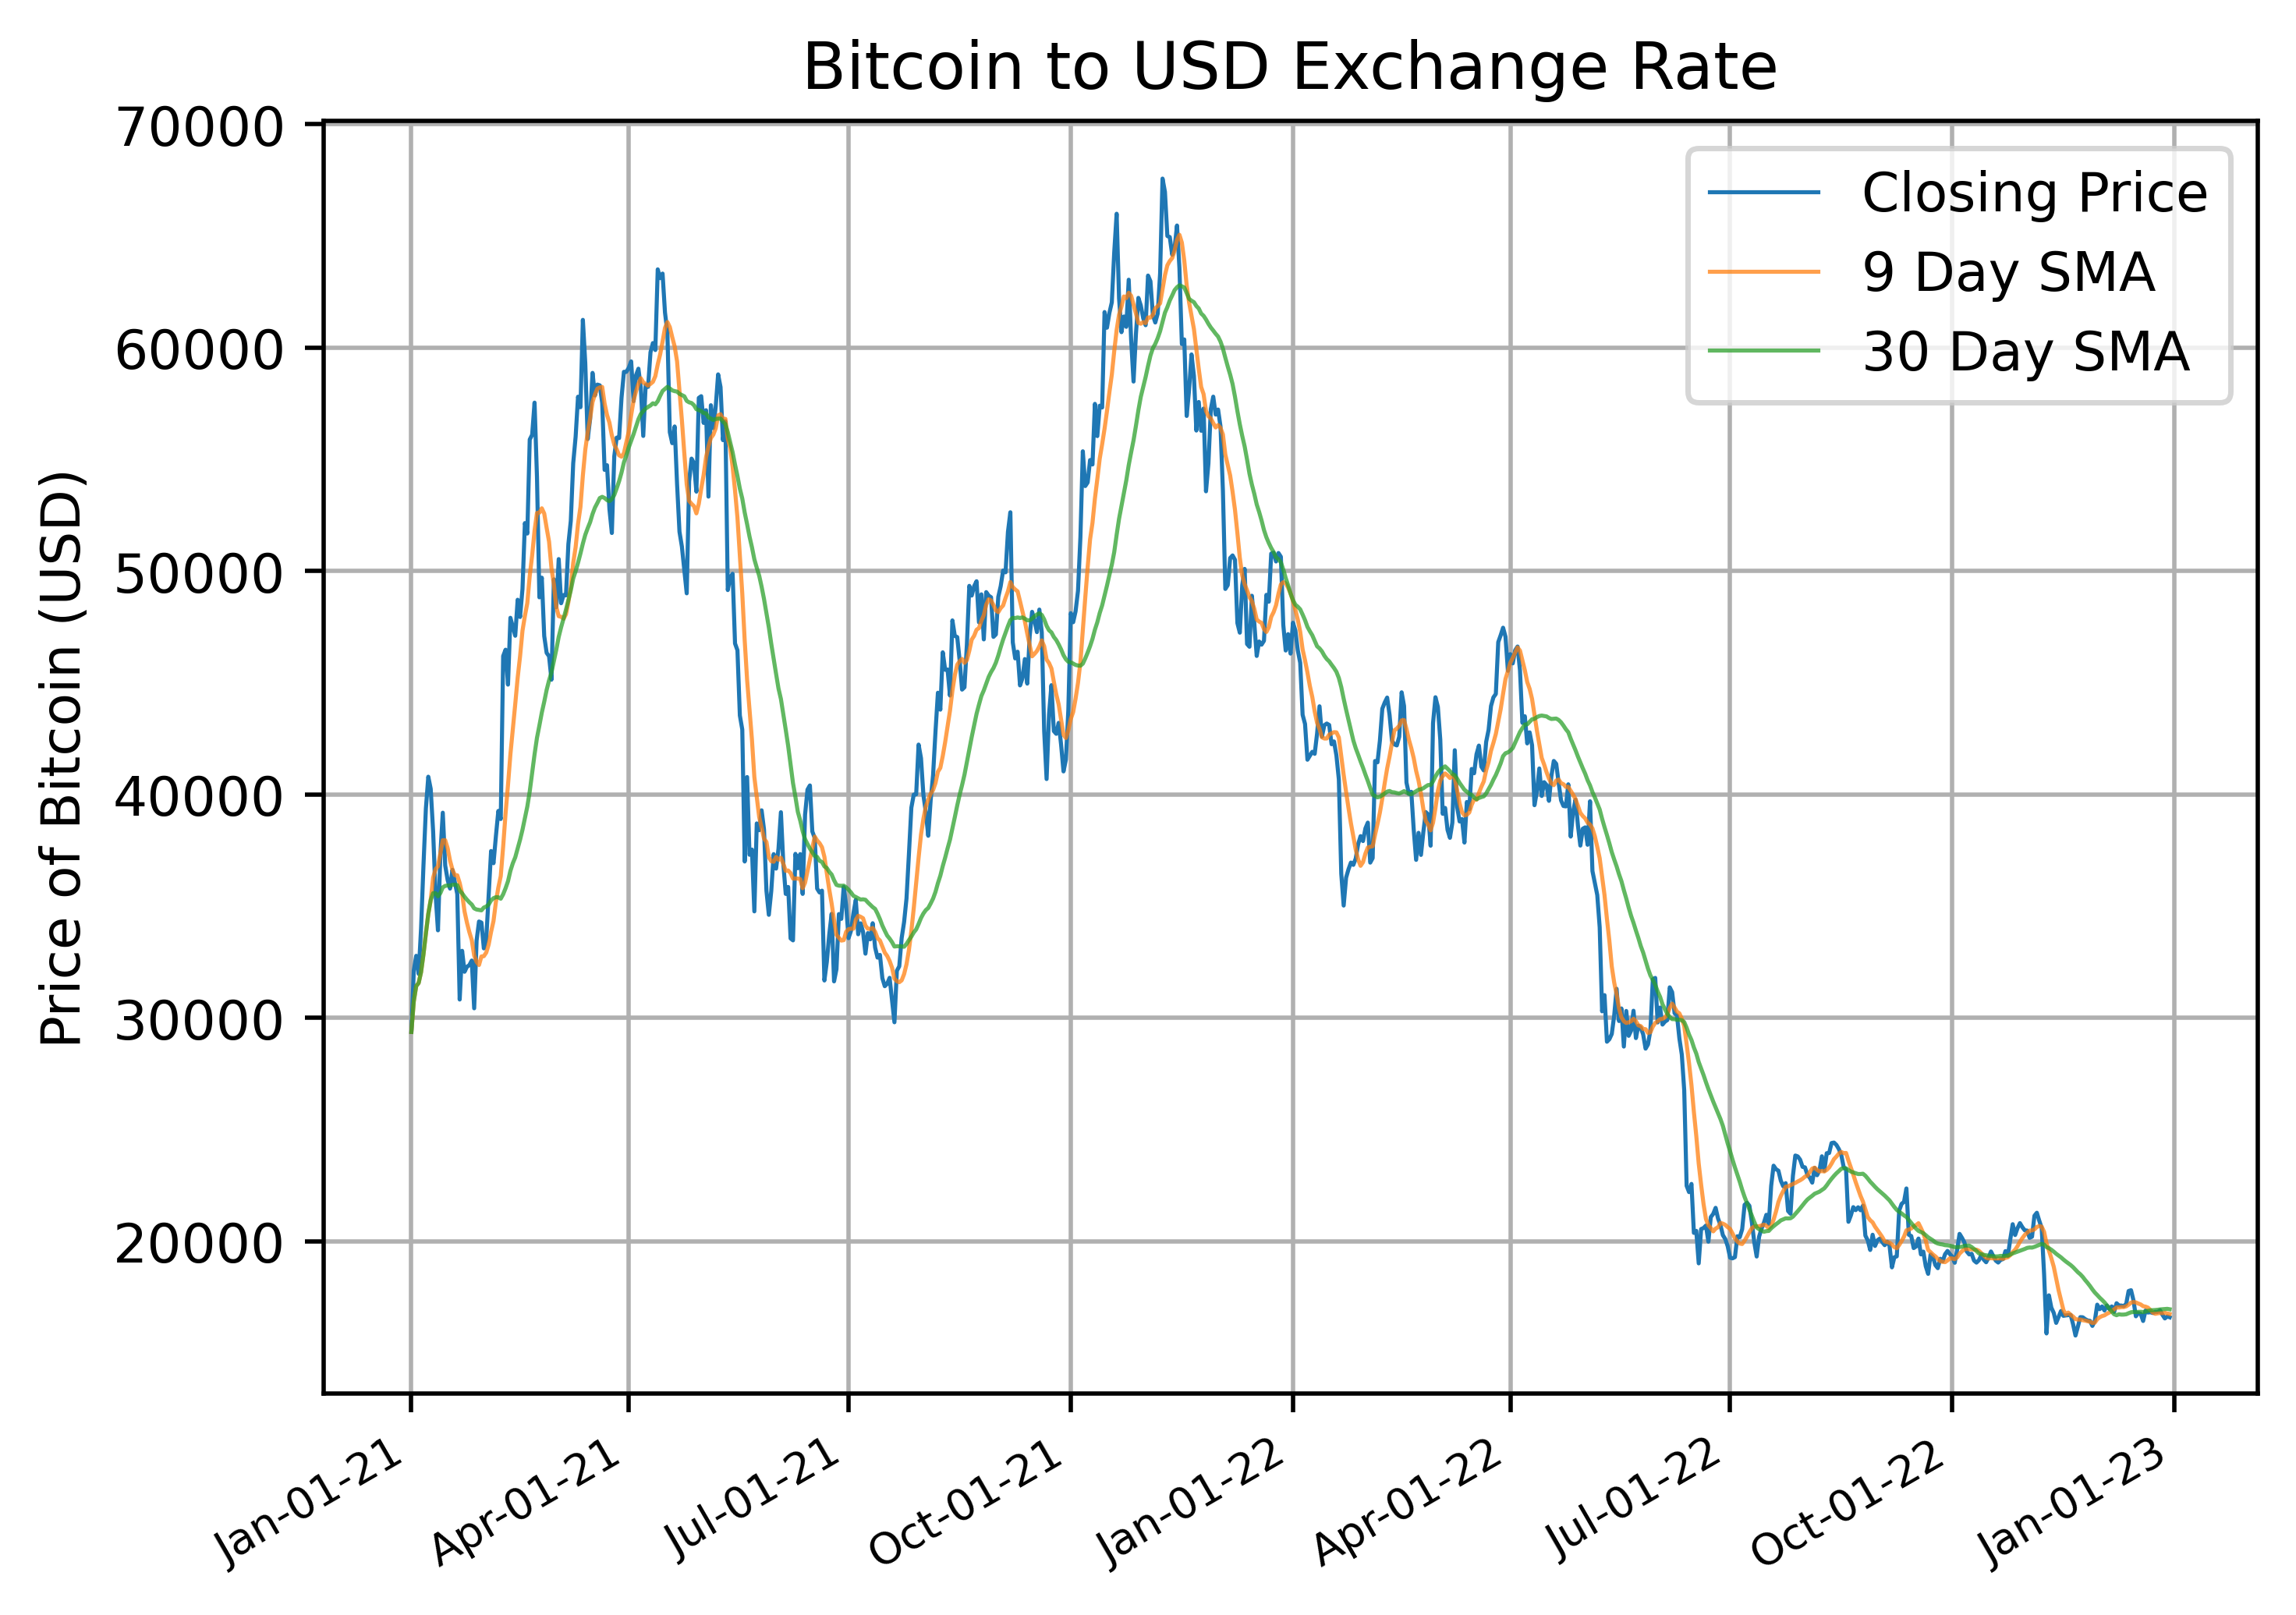

In [54]:
fig, ax = plt.subplots(dpi=500)

# Formatting the date axis
date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()

# Plotting the closing price against the date (1 day interval)
ax.plot(BTC_USD['Close'], lw=0.75, label='Closing Price') # Added label

"""
You have already seen the code above earlier - we are simply reusing it.
Below we plot the 9 and 30 day Simple Moving Averages and give them the appropriate label
"""
ax.plot(BTC_USD['SMA_9'], lw=0.75, alpha=0.75, label='9 Day SMA')
ax.plot(BTC_USD['SMA_30'], lw=0.75, alpha=0.75, label='30 Day SMA')


# Adding labels and title to the plot
ax.set_ylabel('Price of Bitcoin (USD)')
ax.set_title('Bitcoin to USD Exchange Rate')
ax.grid() # adding a grid
ax.legend() # adding a legend

# Displaying the price chart
plt.show()

From the plot you can see that the Simple Moving Averages had a smoothing effect on the line chart - much of the short term Bitcoin price fluctuations were smoothed out and the moving averages appear to reveal some longer term trends. As expected, the 30 day interval had a more significant smoothing effect than the 9 day interval. 

There are many trading strategies that make great use of Moving Averages, which you can read more about [***here***](https://www.investopedia.com/ask/answers/122314/how-do-i-use-moving-average-ma-create-forex-trading-strategy.asp?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsanalyzecryptomarketswiththecoinbaseapi457-2023-01-01) if you are interested.


---

As you're likely well aware, the general principle is to buy an asset at a low price, then sell it at a higher price and pocket the difference. The tricky part is that unless you can see the future it's not easy to know which direction the price will move after you buy it. Fortunately, we can try to improve our chances of making a good trade beyond blind luck by sticking to a trading strategy. A great number of trading strategies exist with varying levels of complexity so let's take a look at just one of them for now.

The [***Moving Average Crossover***](https://en.wikipedia.org/wiki/Moving_average_crossover?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsanalyzecryptomarketswiththecoinbaseapi457-2023-01-01) is a straightforward trading strategy using Simple Moving Averages (SMAs). It involves two SMAs, one with a short period and another with a longer period. When the short-term SMA crosses above the long-term SMA, it signals a potential upward trend, suggesting a "buy" opportunity. Conversely, if the short-term SMA crosses below the long-term SMA, it may indicate a downward trend, signaling a "sell" opportunity. This strategy helps traders identify potential reversals in the market trends based on the interaction between short and long-term moving averages.

In [55]:
# Create a pandas dataframe that is the same size as the BTC_USD dataframe and covers the same dates
trade_signals = pd.DataFrame(index=BTC_USD.index)

# Define the intervals for the Fast and Slow Simple Moving Averages (in days)
short_interval = 10
long_interval = 40

# Compute the Simple Moving Averages and add it to the dateframe as new columns
trade_signals['Short'] = BTC_USD['Close'].rolling(window=short_interval, min_periods=1).mean()
trade_signals['Long'] = BTC_USD['Close'].rolling(window=long_interval, min_periods=1).mean()

Now we have a dataframe containing the dates we're interested in and two Simple Moving Averages, one with a short interval and the other with a longer sampling interval. This gives us the information we need to figure out where the two Moving Averages cross, which is the core of this trading strategy. Let's create a new column called `Signal` that is populated everywhere with zeros, except for a one wherever the two Moving Averages cross.

In [56]:
# Create a new column populated with zeros
trade_signals['Signal'] = 0.0

# Wherever the Shorter term SMA is above the Longer term SMA, set the Signal column to 1, otherwise 0
trade_signals['Signal'] = np.where(trade_signals['Short'] > trade_signals['Long'], 1.0, 0.0)   

## Moving Average Crossover Strategy Implementation

1. **Signal Generation:**
   - Created `Signal` column.
   - Value is 1.0 when short-term SMA is above the long-term SMA for at least `short_interval` days, 0.0 otherwise.

2. **Position Determination:**
   - Created `Positions` column.
   - Used `diff()` method on `Signal` column.
   - 1.0 in `Positions` indicates a **buy** order.
   - -1.0 in `Positions` indicates a **sell** order.
   - 0.0 in `Positions` indicates no action.

3. **Implementation:**
   - One line of code: `trade_signals['Positions'] = trade_signals['Signal'].diff()`.
   - Efficiently computes buy and sell signals based on the Moving Average Crossover strategy.

These steps assist the algorithm in deciding when to buy, sell, or take no action based on the short-term and long-term SMA crossovers.


In [57]:
trade_signals['Position'] = trade_signals['Signal'].diff()

---

### Testing
Excellent, we now have the algorithm's decisions on when to buy and sell and Bitcoin over the year of 2022. 

Let's make a plot to visualize the algorithm's trades before going into more detail and analyzing its performance quantiatively. You will plot the closing price and the two Simple Moving Averages you computed as part of the trading strategy. Furthermore, where the trading algorithm decides to make a **buy** order, we will plot an upwards facing green arrow. Where the algorithm places a **sell** order, we will plot a downwards facing red arrow.

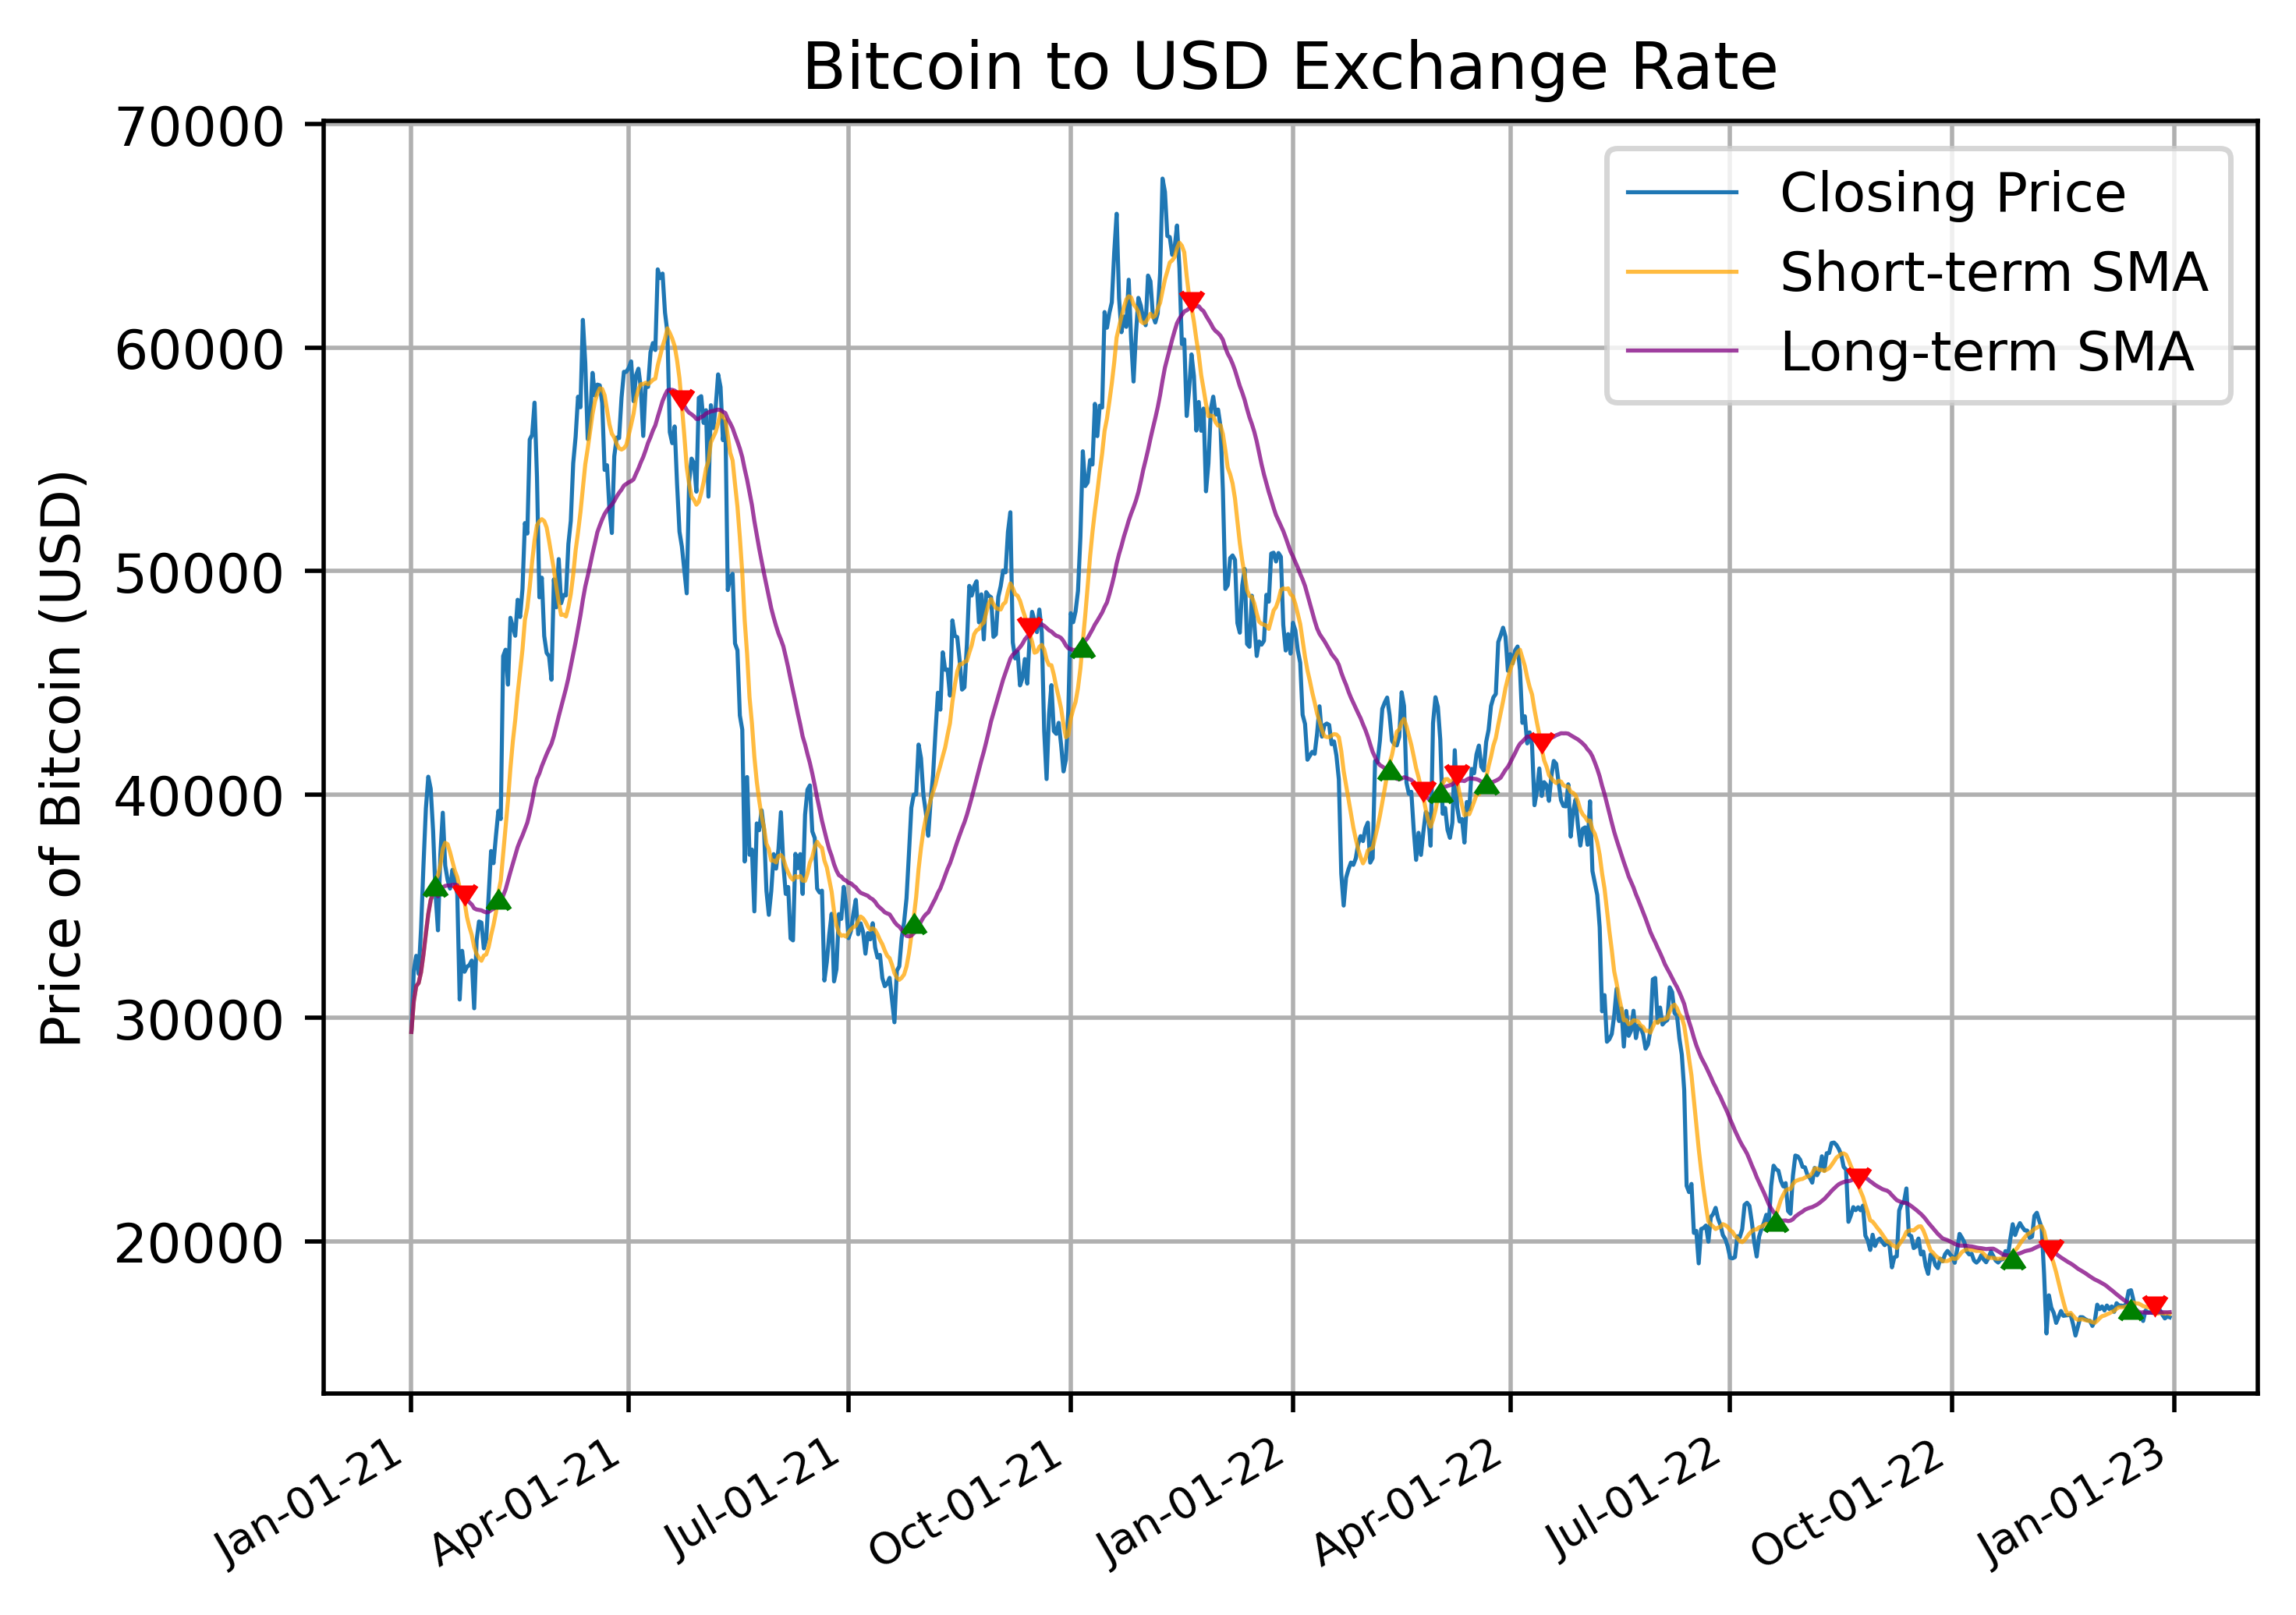

In [58]:
fig, ax = plt.subplots(dpi=500)

# Formatting the date axis
date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()


# Plotting the Bitcoin closing price against the date (1 day interval)
ax.plot(BTC_USD['Close'], lw=0.75, label='Closing Price')

# Plot the shorter-term moving average
ax.plot(trade_signals['Short'], lw=0.75, alpha=0.75, color='orange', label='Short-term SMA')

# Plot the longer-term moving average
ax.plot(trade_signals['Long'], lw=0.75, alpha=0.75, color='purple', label='Long-term SMA')


# Adding green arrows to indicate buy orders
ax.plot(trade_signals.loc[trade_signals['Position']==1.0].index, trade_signals.Short[trade_signals['Position'] == 1.0],
 marker=6, ms=4, linestyle='none', color='green')

 # Adding red arrows to indicate sell orders
ax.plot(trade_signals.loc[trade_signals['Position'] == -1.0].index, trade_signals.Short[trade_signals['Position'] == -1.0],
 marker=7, ms=4, linestyle='none', color='red')


# Adding labels and title to the plot
ax.set_ylabel('Price of Bitcoin (USD)')
ax.set_title('Bitcoin to USD Exchange Rate')
ax.grid() # adding a grid
ax.legend() # adding a legend

# Displaying the price chart
plt.show()

### Backtesting Algorithm

Once you have a trading algorithm implemented, you will certainly want to test it to see if it can actually produce a profit and compare its performace with other strategies. Often, the first way to do this is to perform a [**backtest**](https://www.investopedia.com/terms/b/backtesting.asp?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsanalyzecryptomarketswiththecoinbaseapi457-2023-01-01). The core idea behind a backtest is to simulate running your trading algorithm on historical data and compute several metrics, such as the return. While this method certainly _does not_ guarantee that the algorithmn will be consistently profitable, it's a quick way to test the viability of a strategy and reject clearly unfeasable strategies.

Let's do a simple backtest over the 2022 BTC-USD data on the trading algorithm we implemented. There are many libraries that can perform sophisticated backtests on a variety of algorithms, however, to develop an understanding of the underlying principle, let's implement our own simple backtest. Let's suppose we start with an account with $10,000 USD.


In [59]:
# Define how much money you will start with (in USD)
initial_balance = 10000.0 # ten thousand USD

# Create dataframe containing all the dates considered
backtest = pd.DataFrame(index=trade_signals.index)

# Add column containing the daily percent returns of Bitcoin
backtest['BTC_Return'] = BTC_USD['Close'] / BTC_USD['Close'].shift(1) # Current closing price / yesterday's closing price


Now to compute the daily returns of the trading algorithm, let's assume that at any given point, our portfolio is either all in on Bitcoin or is entirely holding USD. This means that whenever the algorithm is currently holding Bitcoin, it's daily returns are the same as the daily returns of Bitcoin. On the other hand, when the algorithm is holding USD, its returns are entirely detached from Bitcoin price movements. Thus when holding USD, the value of the portfolio remains constant during that period. We will also make the simplifying assumption that we are able to perform zero comission trades. This reasoning is condensed into the following two lines of code.


In [60]:
# Add column containing the daily percent returns of the Moving Average Crossover strategy
backtest['Alg_Return'] = np.where(trade_signals.Signal == 1, backtest.BTC_Return, 1.0)

# Add column containing the daily value of the portfolio using the Crossover strategy
backtest['Balance'] = initial_balance * backtest.Alg_Return.cumprod() # cumulative product

Let's make a plot comparing the performance of trading algorithm we implemented and a simple "Buy and Hold" strategy which will serve as a baseline. Plot the value of the portfolio using either strategy over the course of 2022.

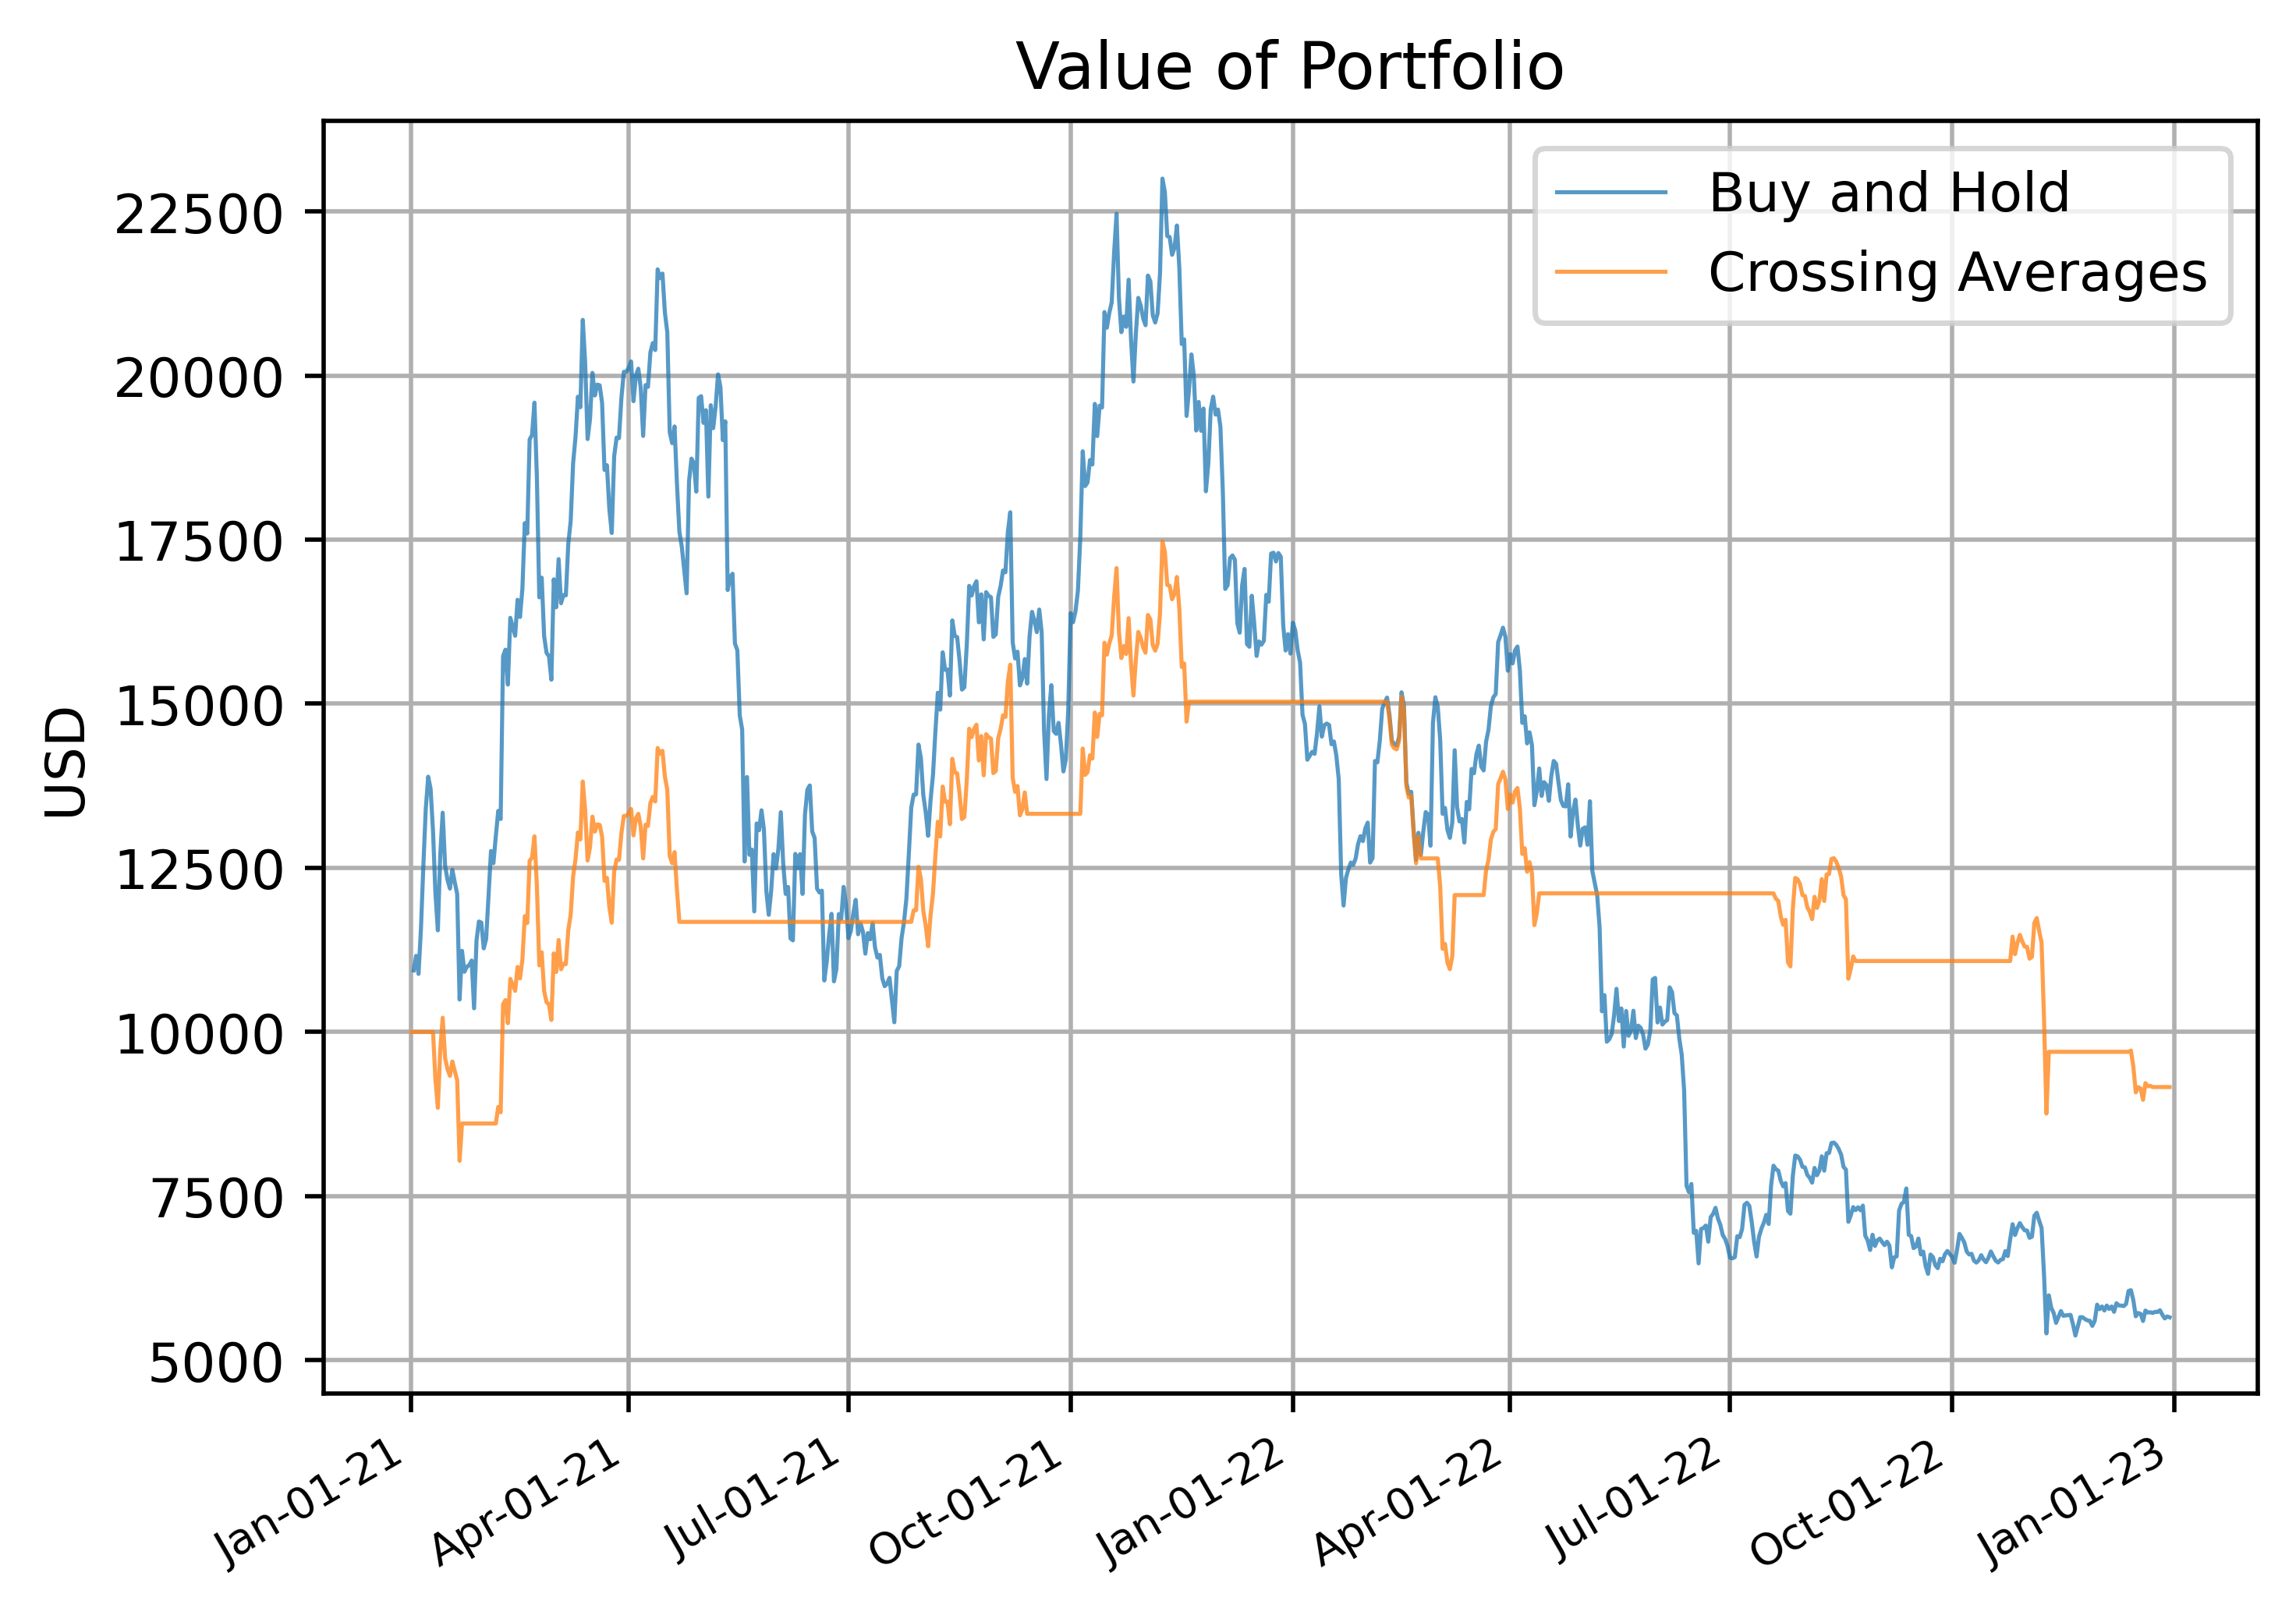

In [61]:
fig, ax = plt.subplots(dpi=500)

# Formatting the date axis
date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()

# Plotting the value of Buy and Hold Strategy
ax.plot(initial_balance*backtest.BTC_Return.cumprod(), lw=0.75, alpha=0.75, label='Buy and Hold')

# Plotting total value of Crossing Averages Strategy
ax.plot(backtest['Balance'], lw=0.75, alpha=0.75, label='Crossing Averages')

# Adding labels and title to the plot
ax.set_ylabel('USD')
ax.set_title('Value of Portfolio')
ax.grid() # adding a grid
ax.legend() # adding a legend

# Displaying the price chart
plt.show()

## Summary of Trading Algorithm Performance

1. **Impressive Returns:**
   - Both trading strategies led to a significant return on investment, more than quadrupling the portfolio's value.
   - Notably driven by Bitcoin's substantial price surge toward the end of the year.

2. **Caution on Future Returns:**
   - The exceptional returns observed are not necessarily indicative of consistent future performance.
   - Investors should be cautious and not expect similar returns in every market condition.

3. **Algorithm Feasibility:**
   - The trading algorithm demonstrates feasibility, showcasing its ability to outperform the baseline Buy and Hold strategy.
   - The algorithm's performance is visible in the plot, with clear periods of being all in on Bitcoin and holding USD.

4. **Risk Mitigation:**
   - During periods of Bitcoin price decline, where the algorithm held USD, the portfolio's value remained steady.
   - This risk mitigation strategy prevented the portfolio from being adversely affected by falling Bitcoin prices.

Overall, while past performance is not indicative of future results, the algorithm's performance in historical data suggests its potential effectiveness and risk mitigation capabilities in dynamic market conditions. Investors should exercise caution and conduct thorough analysis before implementing such strategies.
